## Logistic regression


In [17]:
!pip3 install statsmodels

     |████████████████████████████████| 8.7 MB 194 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 5.4 MB/s eta 0:00:01


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import matplotlib.patches as patches

In [2]:
read_df = pd.read_csv('breast_cancer.csv')
df = read_df.copy()

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
df['diagnosis'].unique()

array([1, 0])

In [3]:
label_encoder = preprocessing.LabelEncoder()
df.diagnosis = label_encoder.fit_transform(df.diagnosis)

In [8]:
sns.set(style = 'whitegrid')

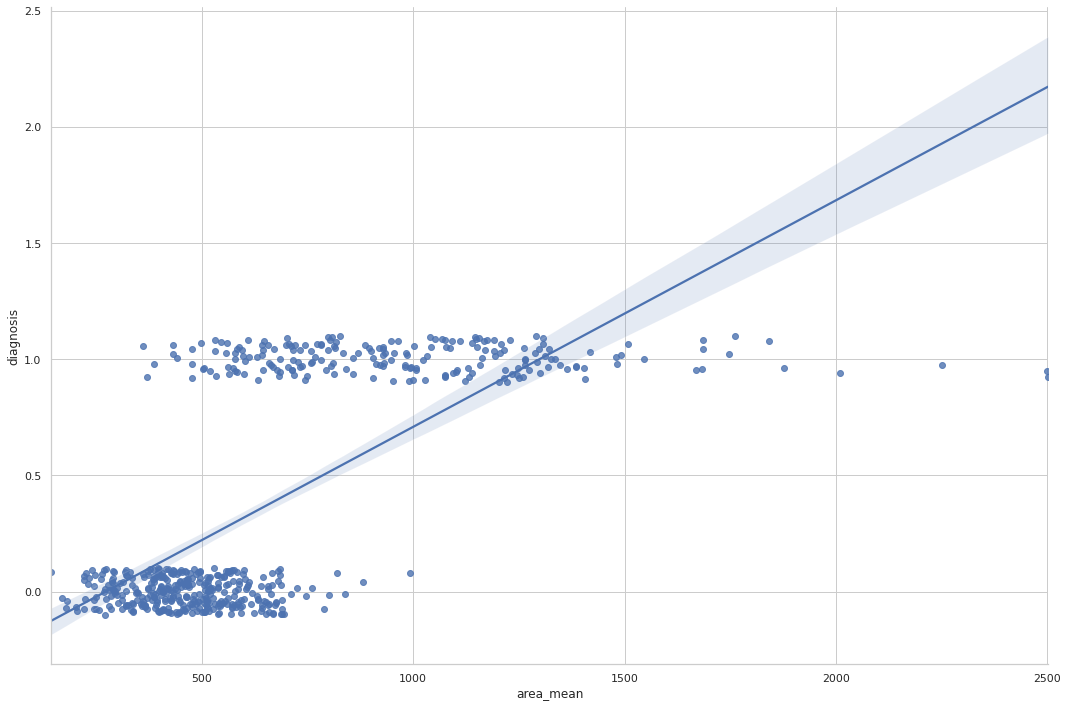

In [9]:
sns.lmplot(x = 'area_mean', y = 'diagnosis', data = df, height = 10, aspect = 1.5, y_jitter = 0.1)

In [10]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [26]:
x = np.linspace(-10,10,num = 1000)

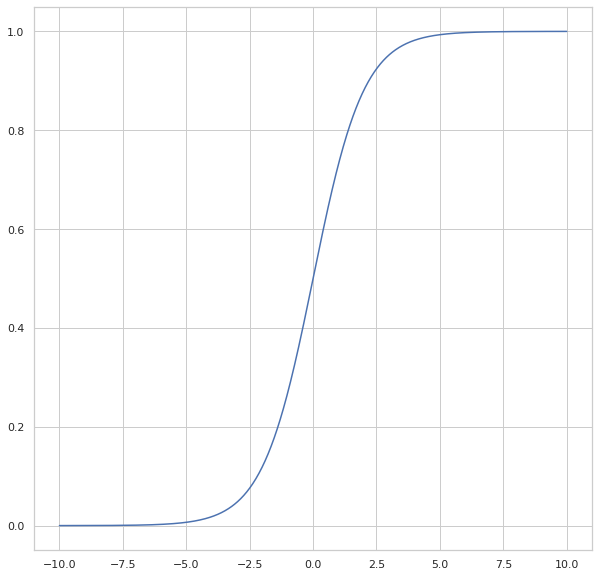

In [27]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
sns.lineplot(x = x, y = sigmoid(x))

In [74]:
x = np.linspace(0, 3, num = 10)

[Text(0, 0.5, 'x2'), Text(0.5, 0, 'x1')]

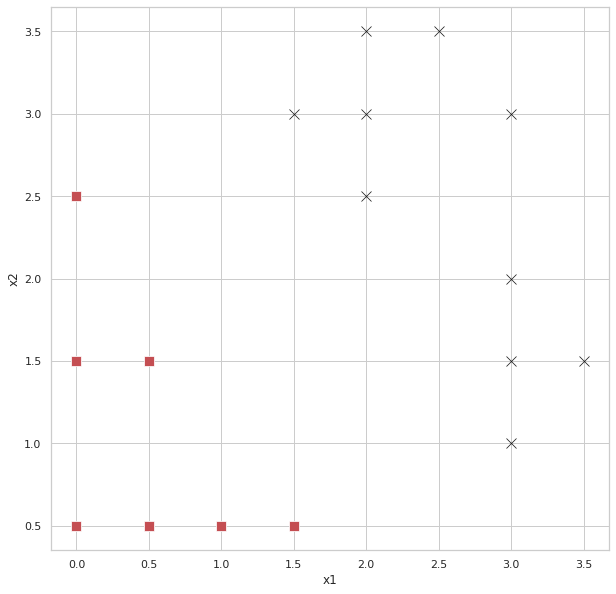

In [79]:
os = np.array([[0, 0.5], [0.5, 0.5], [1.5, 0.5], [1, 0.5], [0.5, 0.5], [0.5, 1.5], [0, 1.5], [0,2.5]])
xs = np.array([[1.5, 3], [2, 3.5], [2, 3], [2, 2.5], [2.5, 3.5], [3, 3], [3, 1.5], [3, 2], [3, 1], [3.5, 1.5]])
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.scatterplot(x = os[:,0], y = os[:,1], marker = 's', s = 100, color = 'r')
ax = sns.scatterplot(x = xs[:,0], y = xs[:,1], marker = 'x', s = 100, color = 'k')
#ax = sns.lineplot(x = x, y = 3-x)
ax.set(xlabel = 'x1', ylabel = 'x2')

In [5]:
theta = np.linspace(0, 2*np.pi , 1000)
r = np.sqrt(1)
x = r*np.cos(theta)
y = r*np.sin(theta)

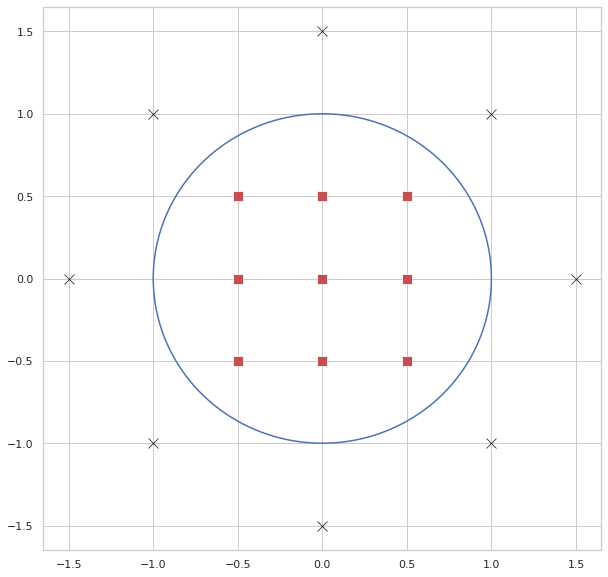

In [7]:
os = np.array([[0,0], [0,0.5], [0.5,0.5], [0.5,0], [-0.5,0.5], [-0.5,0], [-0.5,-0.5], [0,-0.5], [0.5, -0.5],])
xs = np.array([[1,1], [-1,1], [1,-1], [-1,-1], [0,1.5], [-1.5,0], [0,-1.5], [1.5,0]])
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.scatterplot(os[:,0], os[:,1], marker = 's', s = 100, color = 'r')
ax = sns.scatterplot(xs[:,0], xs[:,1], marker = 'x', s = 100, color = 'k') 
ax.plot(x,y, color = 'b')

<ipython-input-411-0b502e9e2536>:4: RuntimeWarning: divide by zero encountered in log
  ax = sns.lineplot(x = x, y = -np.log(1-x))


[Text(0, 0.5, 'cost'), Text(0.5, 0, 'h(x)')]

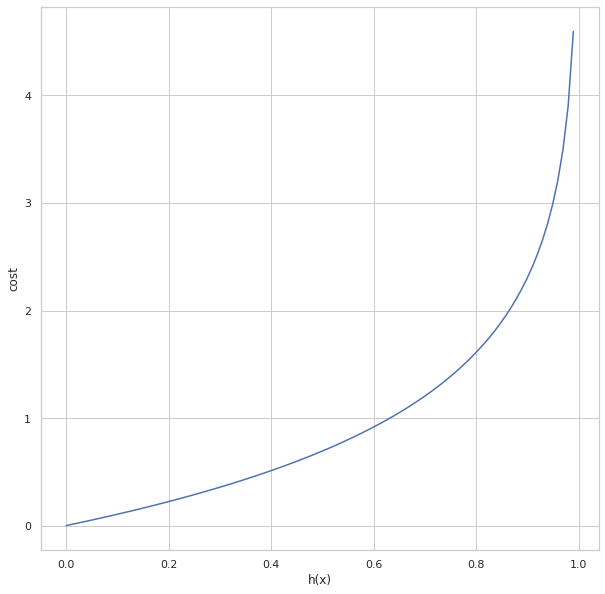

In [411]:
x = np.linspace(0,1, num = 100)
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.lineplot(x = x, y = -np.log(1-x))
ax.set(xlabel = 'h(x)', ylabel = 'cost')

In [195]:
x = np.array(df.area_mean)
y = np.array(df.diagnosis)

In [196]:
x = preprocessing.scale(x)

In [237]:
theta_0_gd = 0
theta_1_gd = 0
alpha = 0.001
h_theta_0_gd = 1
h_theta_1_gd = 1
epoch = 0
Epoch = []
m = len(x)
j = 0
J = []

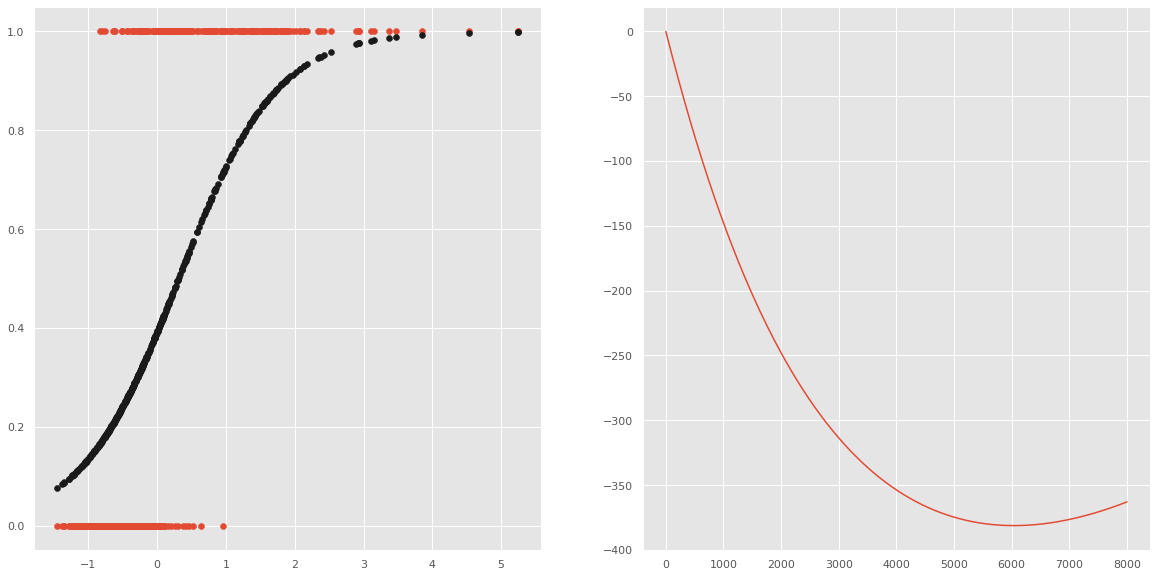

In [239]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
style.use('ggplot')
ax1.scatter(x,y)
while h_theta_0_gd != 0 or h_theta_0_gd != 0:
    if epoch > 8000:
        break
    h_theta_0_gd = 0
    h_theta_1_gd = 0
    for i in range(len(x)):
        h_theta_0_gd += ((1/(1+np.exp(-(theta_0_gd + (theta_1_gd * x[i]))))) - y[i])
        h_theta_1_gd += (((1/(1+np.exp(-(theta_0_gd + (theta_1_gd * x[i]))))) - y[i]) * x[i])
    h_theta_0_gd = (1/m) * h_theta_0_gd
    h_theta_1_gd = (1/m) * h_theta_1_gd
    theta_0_gd -= (alpha * h_theta_0_gd)
    theta_1_gd -= (alpha * h_theta_1_gd)
    for i in range(m):
        j += ((y[i] * (np.log(1/(1+np.exp(-(theta_0_gd + (theta_1_gd * x[i]))))))) - ((1-y[i]) * np.log(1-(1/(1+np.exp(-(theta_0_gd + (theta_1_gd * x[i]))))))))
    J.append((-1/m) * j)
    epoch += 1
    Epoch.append(epoch)
ax1.scatter(x,(1/(1+np.exp(-(theta_0_gd + (theta_1_gd * x))))) , color = 'k')
ax2.plot(Epoch,J)
plt.show()

In [47]:
print(theta_0_gd, theta_1_gd)

-0.4173702618170074 3.0623106036104937


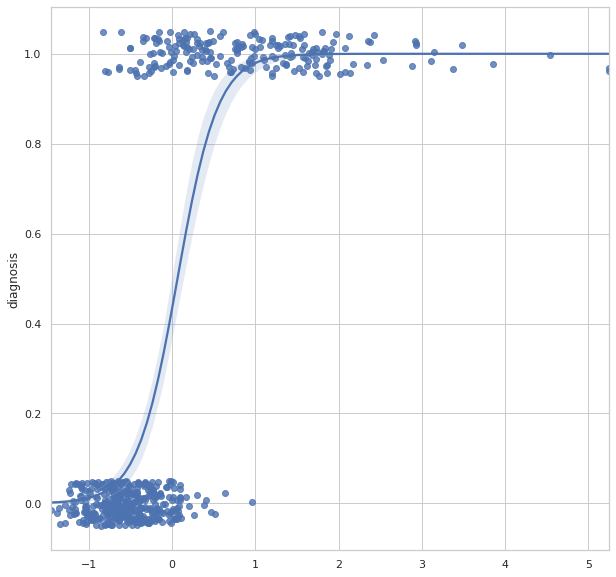

In [21]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.regplot(x = x, y = y, logistic = True, y_jitter = 0.05)

In [105]:
x = np.array(df.area_mean).reshape(-1,1)
y = np.array(df.diagnosis)
x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33)
clf = LogisticRegression(max_iter = 5000)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9148936170212766


In [106]:
Theta_1 = clf.coef_
print(Theta_1)

[[3.23792981]]


In [107]:
Theta_0 = clf.intercept_
print(Theta_0)

[-0.3321435]


In [121]:
X = np.array(df.area_mean)

In [122]:
X = preprocessing.scale(X)

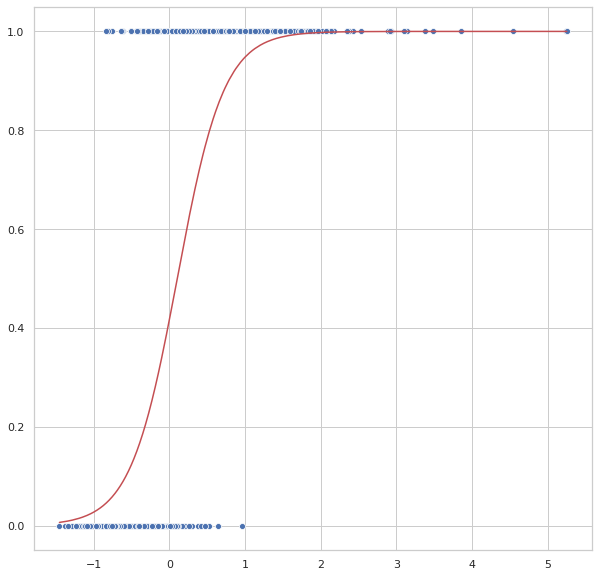

In [130]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(X,y)
ax = sns.lineplot(X, (1/(1+np.exp(-(Theta_0 + (Theta_1[0] * X))))), color = 'r')